# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Содержание проекта  <a class="anchor" id="0-bullet">
* [1. Подготовка данных](#1-bullet)
* [2. Анализ данных](#2-bullet)
* [3. Модель](#3-bullet)
* [Общий вывод](#4-bullet)

# 1. Подготовка данных<a class="anchor" id="1-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### <span style="color:green">План подготовки данных.<span>

1. Загрузим и проанализируем таблицы
2. Проверим, корректно ли рассчитана эффективность обогащения, для чего
 - Удалим все строки с пустыми значениями из тренировочной таблицы.
 - Рассчитаем эффективность очистки по формуле.
 - Проверим MAE между расчетным признаком и признаком из таблицы.
3. Изучим признаки, которых нет в тестовой выборке. Для этого выделим их из тренировочной выборки в отдельный датасет.
4. Подготовим данные для изучения, удалим пропуски и преобразуем данные при необходимости.
5. Добавим необходимые признаки из общего датасета в тестовую выборку и удалим ненужные признаки из тренировочной выборки.

In [3]:
import pandas as pd

datasets_path = ''
#datasets_path = 'C:/Users/Venik/OneDrive/Документы/Yandex_Praktikum/Grouped_Project_2_gold_mining'

In [4]:
gold_recovery_train = pd.read_csv(datasets_path + '/datasets/gold_recovery_train.csv')
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
gold_recovery_train.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4432,2016-07-17 15:59:59,7.404443,7.634566,15.313622,42.922033,73.092614,9.773279,2.162659,11.455743,2.632337,...,15.050482,-399.735000,5.041443,-400.264419,9.883693,-399.905653,5.043564,-399.564556,23.017217,-500.632567
3673,2016-06-16 00:59:59,5.569765,10.702323,8.537918,42.298053,73.969641,6.917753,1.225206,10.928358,1.985952,...,15.927932,-499.455280,13.890366,-499.353269,14.004074,-498.549292,12.003614,-499.802971,25.008307,-499.784849
7351,2017-03-18 06:59:59,6.177723,9.921605,11.181573,44.536390,69.909424,9.483761,2.503183,12.772565,2.667833,...,24.969842,-399.839811,23.020145,-399.971604,21.036413,-450.214654,20.020838,-449.464452,25.009732,-500.432643
9342,2017-06-09 05:59:59,4.208544,10.322307,7.618661,46.189495,55.777960,8.438559,3.223668,9.773144,3.365665,...,15.070121,-502.148729,10.080743,-380.318176,15.002296,-500.374919,9.992484,-499.899080,14.990567,-501.655012
6523,2017-02-11 18:59:59,6.252865,8.527114,16.159606,44.915975,69.113796,11.990089,3.721581,12.164808,4.175654,...,24.989549,-401.458821,22.981758,-400.549815,23.000163,-450.299502,20.003431,-450.072055,24.981299,-599.945408


In [6]:
gold_recovery_test = pd.read_csv(datasets_path + '/datasets/gold_recovery_test.csv')
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
gold_recovery_test.sample(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3381,2017-09-19 21:59:59,175.360180,8.521547,6.30,1.573293,1398.908239,-499.472165,1397.885001,-501.631314,1399.449640,...,12.009691,-499.608585,9.041721,-400.061320,9.044438,-500.424818,6.959445,-500.181762,9.997347,-499.267850
2865,2016-12-29 09:59:59,138.013932,5.972734,7.70,1.091508,1635.253428,-500.338670,1709.570093,-501.677387,1701.785171,...,17.009612,-499.248114,14.980007,-500.308726,14.933856,-500.217344,11.994861,-499.659147,20.971653,-499.995192
4365,2017-10-30 21:59:59,161.471825,9.372989,6.15,1.802571,1701.038305,-498.934370,1698.565543,-502.165050,1590.313690,...,17.997360,-498.960897,16.042931,-499.574251,14.978740,-499.323053,10.947359,-499.907394,15.981210,-498.230345
2210,2016-12-02 02:59:59,257.391573,8.519095,7.79,1.214758,1498.055380,-500.643239,1498.523686,-500.339659,1501.058122,...,18.044430,-500.299749,15.999912,-500.190570,16.614609,-498.850089,12.030979,-488.092614,22.019834,-499.733668
1066,2016-10-15 10:59:59,198.338801,15.038462,7.15,1.094908,1612.382618,-500.011386,1701.130817,-499.880167,1700.985736,...,15.950137,-499.424253,11.946237,-500.269704,8.691478,-501.718666,7.886228,-499.988749,16.980520,-500.784396


In [8]:
gold_recovery_full = pd.read_csv(datasets_path + '/datasets/gold_recovery_full.csv')
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [9]:
gold_recovery_full.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16119,2017-11-16 14:59:59,4.717838,9.226010,7.882099,47.259196,79.237615,9.941302,1.277099,11.722905,2.121725,...,16.992015,-497.773861,10.010355,-498.846142,10.997994,-498.544957,8.945958,-500.115156,16.012324,-497.201338
2696,2016-05-06 07:59:59,4.702278,11.242161,8.866449,45.094346,59.540146,8.412828,2.553735,11.519017,3.664465,...,14.003152,-498.996683,11.986256,-499.577095,11.025526,-500.412132,10.023178,-500.028713,19.981415,-501.583902
13580,2017-08-02 19:59:59,4.074815,8.990990,7.447371,47.233804,66.436734,7.804519,2.190896,10.471182,2.284658,...,12.967486,-500.452226,10.031432,-400.283861,11.022685,-500.055363,9.014157,-499.827661,12.015370,-500.227437
17435,2018-01-10 10:59:59,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,20.052310,-799.611661,15.086600,-799.748337,11.100963,-797.115611,9.042955,-800.008577,10.965264,-804.214787
18050,2018-02-05 01:59:59,5.558516,10.931900,8.328831,45.799153,76.665093,12.410061,2.896941,9.700890,3.056189,...,19.939286,-500.565797,14.899142,-500.030157,10.845563,-501.199874,9.000813,-500.133032,11.002106,-501.759009


<span style="color:green">В таблице с тестовыми данными колонок существенно меньше, чем в тренировочной и полной выборке. Необходимо провести анализ, каких колонок не хватает. Но для начала в целом проверим, верно ли рассчитан целевой признак.<span>

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
тут мы совсем похожи - мне тоже нравится зелёный:)

In [10]:
gold_recovery_train_dropped = gold_recovery_train.dropna()
gold_recovery_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  11017 non-null object
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant             

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
gold_recovery_train_dropped['rougher.output.recovery.counted'] = (

    (gold_recovery_train_dropped['rougher.output.concentrate_au'] * (gold_recovery_train_dropped['rougher.input.feed_au']-
                                                               gold_recovery_train_dropped['rougher.output.tail_au']))/
    (gold_recovery_train_dropped['rougher.input.feed_au'] * (gold_recovery_train_dropped['rougher.output.concentrate_au']-
                                                               gold_recovery_train_dropped['rougher.output.tail_au'])) * 100
    
    )

#F = rougher.input.feed_au
#C = rougher.output.concentrate_au  
#T rougher.output.tail_au 

mae_recovery = mean_absolute_error(gold_recovery_train_dropped['rougher.output.recovery'],
                                   gold_recovery_train_dropped['rougher.output.recovery.counted'])

mae_recovery

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


9.555596961987514e-15

<span style="color:green">Среднее абсолютное отклонение между эффективностью флотации из таблицы и рассчитанной эффективностью флотации фактически равно нулю. Целевой признак в тренировочной выборке рассчитан правильно.<span>

<span style="color:red">Приступим к изучению того, каких колонок не хватает в тестовой выборке.<span>

In [13]:
extra_features_gold_recovery_train = gold_recovery_train.drop(gold_recovery_test.columns, axis = 1)

extra_features_gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.output.concentrate_sol      

In [14]:
extra_features_gold_recovery_train.sample(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
755,6.106360,11.042916,NaN,42.520410,59.638066,10.608330,1.277839,12.465123,2.906240,9.660373,...,17.695823,86.651309,5.066983,0.537160,20.228463,1.284283,10.315871,3.953295,9.906656,3.767578
363,6.371620,11.516225,9.695282,41.622593,70.286649,11.262821,1.919267,17.822885,3.170354,10.323894,...,20.865105,78.667325,6.597785,1.069717,18.151727,2.926038,12.981768,4.389662,12.791281,3.015154
11716,5.647482,9.473484,9.579519,46.266848,71.810270,10.650399,1.740068,12.422870,2.866402,8.615241,...,20.885052,88.455727,5.546849,0.582149,23.681276,1.614299,18.330256,7.253872,3.537510,5.115719
2634,4.516389,10.659155,10.146847,46.427216,57.790264,6.497714,1.597410,13.650067,3.247395,7.716016,...,22.045096,78.831883,5.406226,0.863268,17.927491,1.984478,13.145009,4.332205,11.085388,3.689806
2338,9.036035,10.919191,16.723903,39.470570,63.954956,6.792714,1.411284,13.221369,2.967759,9.987340,...,22.168297,79.231332,5.833322,0.774843,18.865859,2.037786,10.626383,3.838804,8.235153,4.419458
9713,4.808101,11.174998,8.073149,44.328004,67.472058,7.912190,2.555788,9.982570,2.481058,7.977900,...,19.172297,81.838143,5.606913,0.517595,15.526953,1.752389,16.638884,7.071186,2.440878,4.461999
13296,4.267647,10.817968,7.182380,47.608260,72.549334,9.199080,2.099568,8.360710,2.022933,5.919127,...,19.242725,87.727235,4.405395,0.745544,17.915684,1.164992,16.941528,10.172420,NaN,4.499562
2139,6.739085,11.026391,8.308017,40.559200,69.028823,7.358115,1.972024,11.126192,2.361131,10.017461,...,18.981034,81.036444,5.207134,0.725290,16.186012,1.797547,11.045512,4.692265,8.823298,2.947443
13412,5.724198,9.805457,8.896931,45.563597,60.640780,11.987687,3.452175,8.322448,3.967171,8.709840,...,19.439917,88.055278,5.747624,0.811858,15.884032,1.776821,17.232008,9.822004,3.477578,8.149038
2596,8.110281,9.015977,12.327433,41.731781,68.947768,10.325734,1.269302,13.269760,3.138384,9.028186,...,22.490610,74.916845,7.841241,0.865163,19.195755,3.053159,16.814167,2.477008,11.822028,2.421072


<span style="color:green">Признаки, которых нет в тестовых данных (помимо даты и времени):<span>

1. Выходные параметры металлов и хвостов для каждого уровня. 
2. Выходные параметры эффективности очистки для каждого уровня.
3. Ряд вычисленных параметров на определенных этапах, которые мы при необходимости можем вычислить на основании остальных данных. Их можно удалить.
    
<span style="color:red">Прежде чем приступить к подготовке данных, оставим только признаки, которые есть в исходной выборке, плюс целевые признаки и выходные параметры металлов.<span>

In [15]:
# Функция для добавления параметров в список
def append_list(list_in):

    list_in.append('final.output.recovery')
    list_in.append('final.output.concentrate_ag')
    list_in.append('final.output.concentrate_pb')
    list_in.append('final.output.concentrate_sol')
    list_in.append('final.output.concentrate_au')
    list_in.append('final.output.tail_ag')
    list_in.append('final.output.tail_pb')
    list_in.append('final.output.tail_sol')
    list_in.append('final.output.tail_au')

    list_in.append('rougher.output.recovery')
    list_in.append('rougher.output.concentrate_ag')
    list_in.append('rougher.output.concentrate_pb')
    list_in.append('rougher.output.concentrate_sol')
    list_in.append('rougher.output.concentrate_au')
    list_in.append('rougher.output.tail_ag')
    list_in.append('rougher.output.tail_pb')
    list_in.append('rougher.output.tail_sol')
    list_in.append('rougher.output.tail_au')

    return list_in


In [16]:
list_gold_recovery_test_columns = list(gold_recovery_test.columns)

list_gold_recovery_test_columns = append_list(list_gold_recovery_test_columns)

gold_recovery_train_fitted = gold_recovery_train[list_gold_recovery_test_columns]

gold_recovery_train_fitted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 71 columns):
date                                          16860 non-null object
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null float64
primary_cleaner.state.floatbank8_d_level      16833 non-null flo

In [17]:
gold_recovery_train_fitted.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,final.output.tail_au,rougher.output.recovery,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,2.143149,87.107763,11.500771,7.101074,28.029297,19.793808,5.008018,0.508728,19.154297,1.170244
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,2.224930,86.843261,11.615865,7.278807,28.067063,20.050975,4.955378,0.536689,18.965234,1.184827
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,2.257889,86.842308,11.695753,7.216833,27.454037,19.737170,4.843460,0.546416,18.808533,1.162562
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,2.146849,87.226430,11.915047,7.175616,27.341277,19.320810,4.655288,0.542525,19.330200,1.079755
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,2.055292,86.688794,12.411054,7.240205,27.041023,19.216101,4.552800,0.515438,19.267422,1.012642


In [18]:
# Таблица упорядочена по времени. Можем применить параметр 'ffill' метода 'fillna' 
gold_recovery_train_fitted.fillna(method = 'ffill', inplace = True)
gold_recovery_train_fitted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 71 columns):
date                                          16860 non-null object
primary_cleaner.input.sulfate                 16860 non-null float64
primary_cleaner.input.depressant              16860 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                16860 non-null float64
primary_cleaner.state.floatbank8_a_air        16860 non-null float64
primary_cleaner.state.floatbank8_a_level      16860 non-null float64
primary_cleaner.state.floatbank8_b_air        16860 non-null float64
primary_cleaner.state.floatbank8_b_level      16860 non-null float64
primary_cleaner.state.floatbank8_c_air        16860 non-null float64
primary_cleaner.state.floatbank8_c_level      16860 non-null float64
primary_cleaner.state.floatbank8_d_air        16860 non-null float64
primary_cleaner.state.floatbank8_d_level      16860 non-null flo

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


<span style="color:green">Теперь необходимо из общей таблицы добавить список признаков в тестовую, чтобы они были такими же как в тренировочной. Для этого мы:<span>
1. Сформируем список дополнительных реквизитов.
2. Отберем колонки из полной таблицы.
3. "Приклеим" недостающие признаки из общей таблицы к тестовой (по дате).

In [19]:
columns_list = ['date']

columns_list = append_list(columns_list)

gold_recovery_full_need_columns = gold_recovery_full[columns_list]

gold_recovery_full_need_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 19 columns):
date                              22716 non-null object
final.output.recovery             20753 non-null float64
final.output.concentrate_ag       22627 non-null float64
final.output.concentrate_pb       22629 non-null float64
final.output.concentrate_sol      22331 non-null float64
final.output.concentrate_au       22630 non-null float64
final.output.tail_ag              22633 non-null float64
final.output.tail_pb              22516 non-null float64
final.output.tail_sol             22445 non-null float64
final.output.tail_au              22635 non-null float64
rougher.output.recovery           19597 non-null float64
rougher.output.concentrate_ag     22618 non-null float64
rougher.output.concentrate_pb     22618 non-null float64
rougher.output.concentrate_sol    22526 non-null float64
rougher.output.concentrate_au     22618 non-null float64
rougher.output.tail_ag            199

In [20]:
gold_recovery_test_fitted = pd.merge(gold_recovery_test, 
                                     gold_recovery_full_need_columns,
                                    how ='left', 
                                    on = ['date'])

gold_recovery_test_fitted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 71 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [21]:
# Таблица упорядочена по времени. Можем применить параметр 'ffill' метода 'fillna' 
gold_recovery_test_fitted.fillna(method = 'ffill', inplace = True)
gold_recovery_test_fitted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 71 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
rougher.in

<span style="color:red">Преобразования эти данные не требуют, т.к. все (кроме даты) имеют тип float. Категориальных переменных нет, целочисленными они быть не могут.<span>

### <span style="color:green">Вывод по результатам подготовки данных<span>

<span style="color:green">Мы выполнили следующие действия:<span>

1. Проанализировали выборки. В результате выявили разницу в количестве колонок.
2. Проверили расчет целевого признака в тренировочной выборке. МАЕ близко к нулю, признак вычислен правильно.
3. Привели количество колонок в тренировочной и тестовой выборке к единому виду.
4. Устранили пропуски в данных. Т.к. данные упорядочены по времени, мы применили метод 'fillna' с параметром 'ffill'.

<span style="color:red">Можем приступать к анализу данных.<span>

# 2. Анализ данных<a class="anchor" id="2-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### <span style="color:green">План анализа данных.<span>

1. Проведем анализ изменения концентрации различных металлов между этапами очистки. Для этого возьмем тренировочную выборку без пустых значений.
2. Сравним распределение размера гранул входного сырья на тренировочной и тестовой выборках, чтобы убедиться что они одинаковые. Для этого посмотрим на графики распределения и сформируем нулевую гипотезу о равенстве средних.
3. Проанализируем концентрацию всех веществ, чтобы понять нет ли аномальных значений.

In [22]:
# Создадим сравнительный датасет для графиков
compare_concenrtation = {'x' : [],
                         'hue' : [],
                         'y' : []
                        }

compare_concenrtation_data = pd.DataFrame(compare_concenrtation)

In [23]:
# Импортируем графическую библиотеку
import matplotlib.pyplot as plt
import scipy.stats as scs

# Функция для заполнения параметров гистограммы 
def df_hystogram(series,
                 series_name,
                 description_name,
                 diagram_color,
                 bins_number,
                 compare_data):
    
    n, bins, patches = plt.hist(series, 
                                   bins_number, 
                                   density=True, 
                                   facecolor=diagram_color, 
                                   label = series_name, 
                                   alpha=0.3)
    
    series_description = series.describe()

    compare_data = compare_data.append(pd.DataFrame([[description_name, 
                                                      series_name, 
                                                      series_description[1]]], 
                                                      columns = ['x', 
                                                                'hue',
                                                                'y']),
                                                      ignore_index=True)
    
    y = scs.norm.pdf(bins, series_description[1], series_description[2])

    plt.plot(bins, y, '--'+diagram_color)

    return series_description, compare_data

# Функция для формирования трех диаграм рядом
def df_three_histograms(series1, 
                        series2, 
                        series3, 
                        series_name1, 
                        series_name2, 
                        series_name3, 
                        description_name, 
                        bins_number,
                        xlim_min,
                        xlim_max,
                        ylim_max,
                        compare_data):

    plt.figure(0)

    series1_description, compare_data = df_hystogram(series1,
                                                     series_name1,
                                                     description_name,
                                                     'g',
                                                     bins_number,
                                                     compare_data)

    series2_description, compare_data = df_hystogram(series2,
                                                     series_name2,
                                                     description_name,
                                                     'b',
                                                     bins_number,
                                                     compare_data)

    series3_description, compare_data = df_hystogram(series3,
                                                     series_name3,
                                                     description_name,
                                                     'r',
                                                     bins_number,
                                                     compare_data)

    plt.xlabel('Концентрация вещества')
    plt.ylabel('Частота в выборке')

    plt.gca().set(title=description_name)
    
    if xlim_max != 0:
        plt.xlim(right=xlim_max) 
        
    if xlim_min != 0:
        plt.xlim(left=xlim_min)

    if ylim_max != 0:
        plt.ylim(top=ylim_max) 
        
    
    plt.legend()
    plt.grid()
    plt.plot()
    
    return series1_description, series2_description, series3_description, compare_data

In [24]:
gold_recovery_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 88 columns):
date                                                  11017 non-null object
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant             

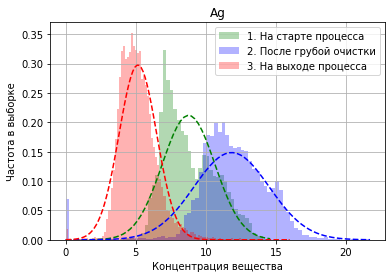

In [25]:
ag_start_descr, ag_rougher_descr, ag_final_descr, compare_concenrtation_data = df_three_histograms(
    gold_recovery_train_dropped['rougher.input.feed_ag'], 
    gold_recovery_train_dropped['rougher.output.concentrate_ag'], 
    gold_recovery_train_dropped['final.output.concentrate_ag'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Ag', 
    'auto',
    0,
    0,
    0,
    compare_concenrtation_data)

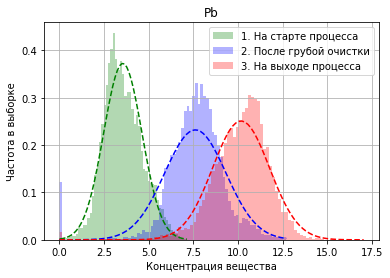

In [26]:
pb_start_descr, pb_rougher_descr, pb_final_descr, compare_concenrtation_data = df_three_histograms(
    gold_recovery_train_dropped['rougher.input.feed_pb'], 
    gold_recovery_train_dropped['rougher.output.concentrate_pb'], 
    gold_recovery_train_dropped['final.output.concentrate_pb'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Pb', 
    'auto',
    0,
    0,
    0,
    compare_concenrtation_data)

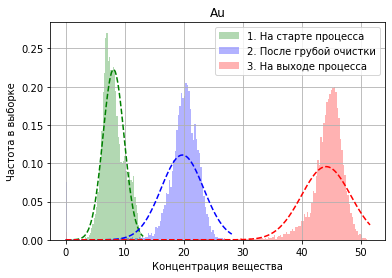

In [27]:
au_start_descr, au_rougher_descr, au_final_descr, compare_concenrtation_data = df_three_histograms(
    gold_recovery_train_dropped['rougher.input.feed_au'], 
    gold_recovery_train_dropped['rougher.output.concentrate_au'], 
    gold_recovery_train_dropped['final.output.concentrate_au'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Au', 
    'auto',
    0,
    0,
    0,
    compare_concenrtation_data)

In [28]:
compare_concenrtation_data

,x,hue,y
0,Ag,1. На старте процесса,8.773065
1,Ag,2. После грубой очистки,11.841982
2,Ag,3. На выходе процесса,5.156333
3,Pb,1. На старте процесса,3.554777
4,Pb,2. После грубой очистки,7.612323
5,Pb,3. На выходе процесса,10.172687
6,Au,1. На старте процесса,8.107739
7,Au,2. После грубой очистки,19.776788
8,Au,3. На выходе процесса,44.131636


Text(0.5, 1, 'Сравнительная гистограмма концентрации металлов по этапам')

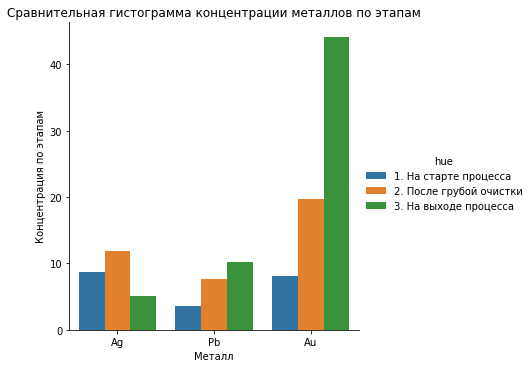

In [29]:
import seaborn as sns

# Построим сравнительную диаграмму
g = sns.catplot(x="x", 
                y="y", 
                hue="hue", 
                kind="bar",
                data=compare_concenrtation_data)

g.set_axis_labels("Металл", "Концентрация по этапам")
g.ax.set_title("Сравнительная гистограмма концентрации металлов по этапам")

In [30]:
compare_concenrtation_data.columns = ['metal','stage','value']
compare_concenrtation_data

,metal,stage,value
0,Ag,1. На старте процесса,8.773065
1,Ag,2. После грубой очистки,11.841982
2,Ag,3. На выходе процесса,5.156333
3,Pb,1. На старте процесса,3.554777
4,Pb,2. После грубой очистки,7.612323
5,Pb,3. На выходе процесса,10.172687
6,Au,1. На старте процесса,8.107739
7,Au,2. После грубой очистки,19.776788
8,Au,3. На выходе процесса,44.131636


### <span style="color:green">Выводы по результатам анализа изменения концентрации метеллов в веществе<span>

1. Концентрация серебра возрастает после этапа грубой очистки и затем резко уменьшается.
2. Концентрация свинца растет незначительно от этапа к этапу.
3. Концентрация золота, как и следовало ожидать растет более чем в 2 раза от этапа к этапу.

    
<span style="color:red">Приступим к сравнению размера гранул сырья в тренировочной и тестовой выборке.<span>

In [31]:
# Создадим сравнительный датасет для графиков
compare_dimension = {'x' : [],
                     'hue' : [],
                     'y' : []
                     }

compare_dimension_data = pd.DataFrame(compare_dimension)

In [32]:
# Функция для формирования двух диаграм рядом
def df_two_histograms(series1, 
                      series2, 
                      series_name1, 
                      series_name2, 
                      description_name, 
                      bins_number,
                      xlim_min,
                      xlim_max,
                      compare_data):

    plt.figure(0)

    series1_description, compare_data = df_hystogram(series1,
                                                     series_name1,
                                                     description_name,
                                                     'g',
                                                     bins_number,
                                                     compare_data)

    series2_description, compare_data = df_hystogram(series2,
                                                     series_name2,
                                                     description_name,
                                                     'b',
                                                     bins_number,
                                                     compare_data)

    plt.xlabel('Размер гранул руды на входе процесса')
    plt.ylabel('Частота в выборке')

    plt.gca().set(title=description_name)

    plt.xlim(xlim_min,xlim_max)
    
    plt.legend()
    plt.grid()
    plt.plot()
    
    return series1_description, series2_description, compare_data

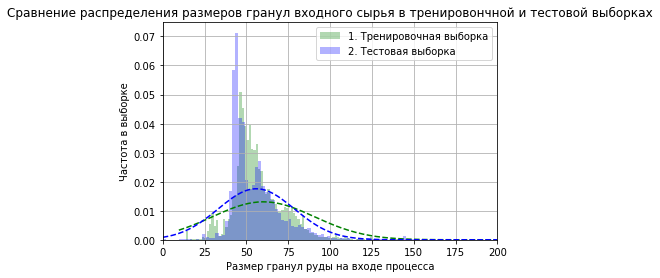

In [33]:
train_descr, test_descr, compare_dimension_data = df_two_histograms(
    gold_recovery_train_fitted['rougher.input.feed_size'], 
    gold_recovery_test_fitted['rougher.input.feed_size'], 
    '1. Тренировочная выборка', 
    '2. Тестовая выборка', 
     'Сравнение распределения размеров гранул входного сырья в тренировончной и тестовой выборках', 
    'auto',
    0,
    200,
    compare_dimension_data)

<span style="color:green">Внешний вид распределения очень похож, сравним параметры распределения. Для этого запишем их в отдельный датасет.<span>

In [34]:
# Создадаим массив строк
rows_list = []

# Напишем функцию для добавления строки в массив
def df_statistic_append(dataframe,
                        column_name,
                        sample_column_name,
                        sample_name,
                        indicator_name):
    
    local_series = dataframe[column_name]
    
    series_description = local_series.describe()

    local_dict = {sample_column_name: sample_name,
                  'indicator': indicator_name, 
                  'mean': series_description[1],
                  'median': series_description[5],
                  'min': series_description[3],
                  'low_kw': series_description[4],
                  'high_kw': series_description[6],
                  'max': series_description[7],
                  'std': series_description[2]
                 }
    rows_list.append(local_dict)

# Добавим строки с параметрами
df_statistic_append(gold_recovery_train_fitted,
                    'rougher.input.feed_size',
                    'feed_size',
                    'Тренировочная выборка',
                    'Размер гранул входного сырья')

df_statistic_append(gold_recovery_test_fitted,
                    'rougher.input.feed_size',
                    'feed_size',
                    'Тестовая выборка',
                    'Размер гранул входного сырья')

# Преобразуем массив в датафрейм
statistic_feed_size = pd.DataFrame(rows_list)

statistic_feed_size

,feed_size,indicator,mean,median,min,low_kw,high_kw,max,std
0,Тренировочная выборка,Размер гранул входного сырья,60.188595,54.066003,9.659576,47.548897,65.397249,484.967466,30.522242
1,Тестовая выборка,Размер гранул входного сырья,55.898866,49.964796,0.046369,43.852884,61.628003,477.445473,22.707969


<span style="color:red">На графиках и при анализе описаний выборок видно, что их параметры очень похожи. Следовательно мы можем обучать модель на тренировочных данных и она будет эффективна на тестовых.<span>

<span style="color:green">Посмотрим на распределение суммарной концентрации сырья на каждом из этапов. Для этого:<span>

1. Вычислим суммарную концентрацию сырья для трех точек (на входе в процесс, после грубой очистки и на выходе из процесса).
2. Посмотрим на распределение и при необходимости очистим выборку от аномальных значений.

In [35]:
gold_recovery_train_fitted['rougher_input_feed'] = (
    gold_recovery_train_fitted['rougher.input.feed_ag'] +
    gold_recovery_train_fitted['rougher.input.feed_pb'] +
    gold_recovery_train_fitted['rougher.input.feed_sol'] +
    gold_recovery_train_fitted['rougher.input.feed_au']
    )

gold_recovery_train_fitted['rougher_output_feed'] = (
    gold_recovery_train_fitted['rougher.output.concentrate_ag'] +
    gold_recovery_train_fitted['rougher.output.concentrate_pb'] +
    gold_recovery_train_fitted['rougher.output.concentrate_sol'] +
    gold_recovery_train_fitted['rougher.output.concentrate_au']
    )

gold_recovery_train_fitted['final_output_feed'] = (
    gold_recovery_train_fitted['final.output.concentrate_ag'] +
    gold_recovery_train_fitted['final.output.concentrate_pb'] +
    gold_recovery_train_fitted['final.output.concentrate_sol'] +
    gold_recovery_train_fitted['final.output.concentrate_au']
    )

gold_recovery_train_fitted.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher_input_feed,rougher_output_feed,final_output_feed
627,2016-02-10 03:00:00,151.501055,10.023461,8.035000,1.308707,1596.537773,-500.044909,1600.330463,-500.081226,1600.344181,...,7.746066,28.662943,19.767444,5.164734,0.721094,20.666832,1.537944,55.478242,67.370363,63.324934
11843,2018-01-21 10:59:59,138.764898,10.992745,7.010000,1.195851,1597.150592,-500.084839,1600.070095,-499.514481,1600.991477,...,7.190580,30.184092,18.311020,4.561878,0.354670,10.903839,1.665682,63.138163,69.266028,72.721605
618,2016-02-09 18:00:00,133.886253,11.497452,8.733333,1.255833,1599.151396,-500.450706,1599.228869,-499.568737,1598.133632,...,7.900875,27.869920,18.700706,5.356498,0.810072,21.032214,1.735255,53.705672,66.541180,65.499682
4463,2016-07-18 22:59:59,152.398695,10.022351,8.519833,0.901314,1597.028229,-499.825467,1595.580108,-499.514368,1599.874399,...,5.793791,26.361487,19.612271,5.259997,0.426589,21.534123,1.316844,60.455287,65.936641,74.331110
3950,2016-06-27 13:59:59,128.689473,5.089488,8.200000,1.206437,1702.724922,-500.959139,1701.392843,-499.658639,1599.502389,...,5.073381,27.620290,19.914640,5.959864,0.547041,23.137630,1.690984,58.531520,67.795371,68.746109


In [36]:
# Создадим сравнительный датасет для графиков
compare_full_concenrtation = {'x' : [],
                         'hue' : [],
                         'y' : []
                        }

compare_full_concenrtation_data = pd.DataFrame(compare_full_concenrtation)

In [37]:
# Создадаим массив строк
rows_list = []

# Добавим строки с параметрами
df_statistic_append(gold_recovery_train_fitted,
                    'rougher_input_feed',
                    'full_concentration',
                    '1. На старте процесса',
                    'Полная концентрация сырья')

# Добавим строки с параметрами
df_statistic_append(gold_recovery_train_fitted,
                    'rougher_output_feed',
                    'full_concentration',
                    '2. После грубой очистки',
                    'Полная концентрация сырья')

# Добавим строки с параметрами
df_statistic_append(gold_recovery_train_fitted,
                    'final_output_feed',
                    'full_concentration',
                    '3. На выходе процесса',
                    'Полная концентрация сырья')

# Преобразуем массив в датафрейм
statistic_full_concentration = pd.DataFrame(rows_list)

statistic_full_concentration

,full_concentration,indicator,mean,median,min,low_kw,high_kw,max,std
0,1. На старте процесса,Полная концентрация сырья,50.443496,55.787615,0.0,50.290705,60.262953,76.024095,18.176831
1,2. После грубой очистки,Полная концентрация сырья,59.961791,68.332115,0.0,61.468859,73.020072,90.964431,24.042979
2,3. На выходе процесса,Полная концентрация сырья,61.267542,68.803475,0.0,66.531283,70.695552,80.210644,21.690164


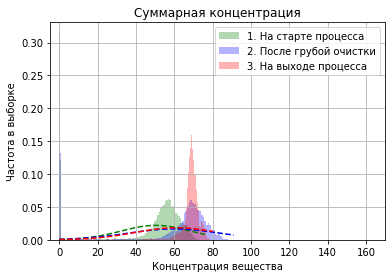

In [38]:
full_start_descr, full_rougher_descr, full_final_descr, compare_full_concenrtation_data = df_three_histograms(
    gold_recovery_train_fitted['rougher_input_feed'], 
    gold_recovery_train_fitted['rougher_output_feed'], 
    gold_recovery_train_fitted['final_output_feed'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Суммарная концентрация', 
    'auto',
    0,
    170,
    0,
    compare_full_concenrtation_data)

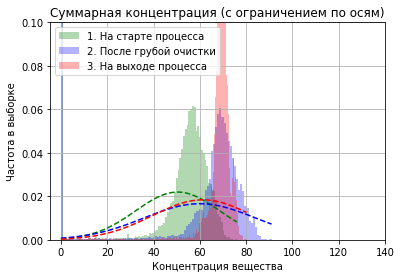

In [39]:
full_start_descr, full_rougher_descr, full_final_descr, compare_full_concenrtation_data = df_three_histograms(
    gold_recovery_train_fitted['rougher_input_feed'], 
    gold_recovery_train_fitted['rougher_output_feed'], 
    gold_recovery_train_fitted['final_output_feed'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Суммарная концентрация (с ограничением по осям)', 
    'auto',
    0,
    140,
    0.10,
    compare_full_concenrtation_data)

<span style="color:green">На графике видны следующие аномалии.<span>

1. На старте процесса - большое количество нулевых значений.
2. В значениях после грубой очистки - выбросы, менее 40 и более 90.
3. На выходе процесса - большое количество нулевых значений.

<span style="color:red">Для повышения точности, необходимо удалить строки, содержащие подобные значения из обеих выборок (тренировочной и тестовой).<span>

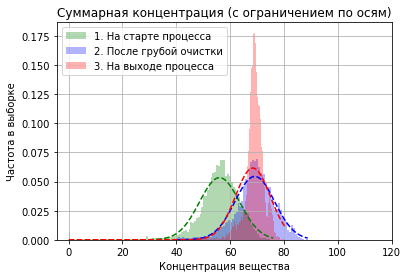

In [40]:
query_expression = (
    '(rougher_input_feed > 0)&' + 
    '(rougher_output_feed > 40)&' +
    '(rougher_output_feed < 90)&' +
    '(final_output_feed > 0)'  
)
gold_recovery_train_fitted = gold_recovery_train_fitted.query(query_expression)


full_start_descr, full_rougher_descr, full_final_descr, compare_full_concenrtation_data = df_three_histograms(
    gold_recovery_train_fitted['rougher_input_feed'], 
    gold_recovery_train_fitted['rougher_output_feed'], 
    gold_recovery_train_fitted['final_output_feed'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Суммарная концентрация (с ограничением по осям)', 
    'auto',
    0,
    120,
    0,
    compare_full_concenrtation_data)

#### <span style="color:green">После удаления аномальных значений стало видно, что на старте процесса есть ряд значений концентрации менее 25, а для выборки на выходе процесса - менее 50.<span>

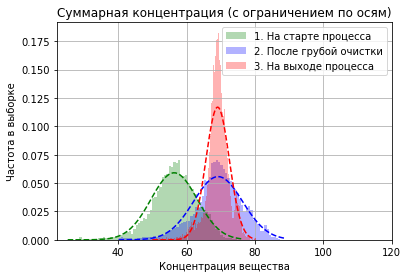

In [41]:
query_expression = (
    '(rougher_input_feed > 25)&' + 
    '(final_output_feed > 50)'  
)
gold_recovery_train_fitted = gold_recovery_train_fitted.query(query_expression)


full_start_descr, full_rougher_descr, full_final_descr, compare_full_concenrtation_data = df_three_histograms(
    gold_recovery_train_fitted['rougher_input_feed'], 
    gold_recovery_train_fitted['rougher_output_feed'], 
    gold_recovery_train_fitted['final_output_feed'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Суммарная концентрация (с ограничением по осям)', 
    'auto',
    0,
    120,
    0,
    compare_full_concenrtation_data)

#### <span style="color:green">Необходимо проделать аналогичную операцию для тестовой выборки.<span>

In [42]:
gold_recovery_test_fitted['rougher_input_feed'] = (
    gold_recovery_test_fitted['rougher.input.feed_ag'] +
    gold_recovery_test_fitted['rougher.input.feed_pb'] +
    gold_recovery_test_fitted['rougher.input.feed_sol'] +
    gold_recovery_test_fitted['rougher.input.feed_au']
    )

gold_recovery_test_fitted['rougher_output_feed'] = (
    gold_recovery_test_fitted['rougher.output.concentrate_ag'] +
    gold_recovery_test_fitted['rougher.output.concentrate_pb'] +
    gold_recovery_test_fitted['rougher.output.concentrate_sol'] +
    gold_recovery_test_fitted['rougher.output.concentrate_au']
    )

gold_recovery_test_fitted['final_output_feed'] = (
    gold_recovery_test_fitted['final.output.concentrate_ag'] +
    gold_recovery_test_fitted['final.output.concentrate_pb'] +
    gold_recovery_test_fitted['final.output.concentrate_sol'] +
    gold_recovery_test_fitted['final.output.concentrate_au']
    )

gold_recovery_test_fitted.sample(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher_input_feed,rougher_output_feed,final_output_feed
2955,2017-09-02 03:59:59,199.587396,6.006916,7.540000,1.118627,1351.962124,-501.089668,1349.956521,-500.207202,1348.587464,...,10.390672,30.441510,18.404730,3.940402,1.251356,14.516088,2.396288,63.839933,70.061641,71.335398
2296,2016-12-05 16:59:59,190.449385,7.998456,8.095833,1.081913,1505.075031,-500.103148,1501.800984,-500.307951,1502.354084,...,7.728008,30.796171,20.480185,6.565747,0.617154,17.667735,2.160037,60.446880,73.910738,72.746826
1951,2016-11-21 07:59:59,181.908725,5.950231,7.010000,1.197897,1622.919916,-501.084622,1650.545286,-500.038774,1653.355177,...,6.413319,25.061145,21.945127,6.368636,0.347101,18.831728,1.726436,55.673115,65.860718,72.092612
1276,2016-10-24 04:59:59,127.147349,5.624118,7.200000,0.896430,1597.709893,-499.065194,1701.573970,-499.096885,1699.894371,...,6.426040,30.424854,23.680330,6.561339,0.434308,17.325685,2.000872,57.233659,72.412691,76.843435
2528,2016-12-15 08:59:59,182.215534,11.933614,6.480000,0.999574,1502.197605,-500.492773,1500.864182,-499.806076,1496.095108,...,7.993981,31.816819,20.290529,5.904344,0.418615,16.772075,1.703199,58.663069,75.568367,72.695938


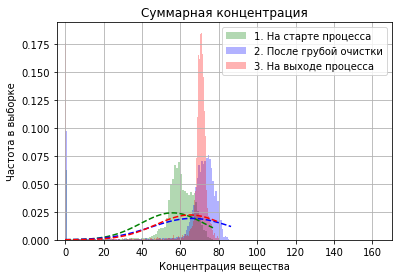

In [43]:
full_start_descr, full_rougher_descr, full_final_descr, compare_full_concenrtation_data = df_three_histograms(
    gold_recovery_test_fitted['rougher_input_feed'], 
    gold_recovery_test_fitted['rougher_output_feed'], 
    gold_recovery_test_fitted['final_output_feed'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Суммарная концентрация', 
    'auto',
    0,
    170,
    0,
    compare_full_concenrtation_data)

#### <span style="color:green">По графику видно, что пороги аномальных значений такие же, как и для тренировочной выборки. Уберем строки с аномальными значениями.<span>

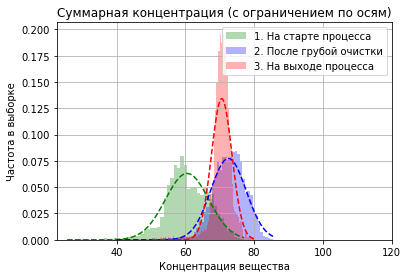

In [44]:
query_expression = (
    '(rougher_input_feed > 25)&' + 
    '(rougher_output_feed > 40)&' +
    '(rougher_output_feed < 90)&' +
    '(final_output_feed > 50)'  
)
gold_recovery_test_fitted = gold_recovery_test_fitted.query(query_expression)


full_start_descr, full_rougher_descr, full_final_descr, compare_full_concenrtation_data = df_three_histograms(
    gold_recovery_test_fitted['rougher_input_feed'], 
    gold_recovery_test_fitted['rougher_output_feed'], 
    gold_recovery_test_fitted['final_output_feed'], 
    '1. На старте процесса', 
    '2. После грубой очистки', 
    '3. На выходе процесса', 
    'Суммарная концентрация (с ограничением по осям)', 
    'auto',
    0,
    120,
    0,
    compare_full_concenrtation_data)

### <span style="color:green">Вывод по результатам анализа данных<span>

<span style="color:green">Мы выполнили следующие действия:<span>

1. Провели анализ изменения концентрации металлов. Результат вполне закономерен - концентрация золота увеличивается при завершении каждого шага технологического процесса.
2. Проверили схожесть графиков и основных параметров размера гранул сырья двух выборок (тренировочной и тестовой). Данные схожи, что позволяет на этих данных тренировать и тестировать модель.
3. Проанализировали выбросы и удалили аномальные значения.

<span style="color:red">Можем приступать к обучению модели.<span>

# 3. Модель<a class="anchor" id="3-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### <span style="color:green">План обучения моделей.<span>

1. Разделим выборку на 2 части. 
 - Для тренировки модели грубой очистки (флотации). Выборка должна содержать следующие признаки: входные параметры этапа, влияющие на исходящий признак, параметры технологического процесса этапа грубой очистки и целевой параметр (для грубой очистки).
 - Для тренировки модели финальной очистки. Включим в выборку входящие параметры этапа (являющиеся исходящими для предыдущего), параметры технологического процесса этапа итоговой очистки и целевой параметр для итоговой очистки.
2. Обучим и проведем валидацию нескольких различных моделей для каждого этапа с различными параметрами. В качестве метрики качества будем использовать Symmetric Mean Absolute Percentage Error. Напишем функцию для ее вычисления.
3. Для каждой обученной модели проверим качество методом bootstrap.
4. Выберем лучшую модель с лучшими параметрами для каждого из этапов технологического процесса.
5. Обучим эти модели на тренировочной выборке и проведем валидацию на тестовой.
6. Вычислим итоговое sMAPE.

In [45]:
# Выберем список колонок со словом rougher

indexes_rougher = []
indexes_final = []


for i in range(len(gold_recovery_train_fitted.columns)):
    current_column = gold_recovery_train_fitted.columns[i]
    if current_column.find('rougher') != -1:
        indexes_rougher.append(current_column)
        if current_column.find('rougher.output') != -1:
            indexes_final.append(current_column)
    else:
        indexes_final.append(current_column)

In [46]:
from sklearn.utils import shuffle

# Функция для разделения выборки на 4 части
def split_df(df):
    # Сформируем из тренировочной выборки таблицу колонок для тренировки предсказаний этапа флотации
    df_rougher = df[indexes_rougher]

    # Удалим колонки, которые не нужны
    df_rougher.drop(['rougher.output.concentrate_ag',
                     'rougher.output.concentrate_pb',
                     'rougher.output.concentrate_sol',
                     'rougher.output.concentrate_au',
                     'rougher.output.tail_ag',
                     'rougher.output.tail_pb',
                     'rougher.output.tail_sol',
                     'rougher.output.tail_au',
                     'rougher_input_feed',
                     'rougher_output_feed'
                     ] ,axis = 1, inplace = True)
    
    
    # Перемешаем строки df_rougher
    df_rougher = shuffle(df_rougher) 
    
    # Выделим из выборки для обучения на этапе грубой очистки целевой признак
    rougher_features = df_rougher.drop(['rougher.output.recovery'], axis = 1)
    rougher_target = df_rougher['rougher.output.recovery']
    
    # Сформируем из тренировочной выборки таблицу колонок для тренировки предсказаний этапа финальной очистки
    df_final = df[indexes_final]


    # Удалим колонки, которые не нужны
    df_final.drop(['date',
                   'rougher.output.recovery',                                  
                   'rougher.output.tail_ag',
                   'rougher.output.tail_pb',
                   'rougher.output.tail_sol',
                   'rougher.output.tail_au',
                   'final.output.concentrate_ag',
                   'final.output.concentrate_pb',
                   'final.output.concentrate_sol',
                   'final.output.concentrate_au',
                   'final.output.tail_ag',
                   'final.output.tail_pb',
                   'final.output.tail_sol',
                   'final.output.tail_au',
                   'final_output_feed'
                   ] ,axis = 1, inplace = True)

    # Перемешаем строки df_final
    df_final = shuffle(df_final) 

    # Выделим из выборки для обучения на этапе итоговой очистки целевой признак
    final_features = df_final.drop(['final.output.recovery'], axis = 1)
    final_target = df_final['final.output.recovery']
    
    return rougher_features, rougher_target, final_features, final_target

In [47]:
train_rougher_features, train_rougher_target, train_final_features, train_final_target = split_df(
    gold_recovery_train_fitted)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
# Импортируем библиотеки
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [49]:
# Функция для расчета sMAPE
def smape(target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

# Создадим скорер для передачи в функцию оценки модели
smape_scorer = make_scorer(smape)

In [48]:
# Датасет для сравнения sMAPE при обучении моделей для различных стадий
compare_models = {'model' : [],
                          'stage' : [],
                          'param' : [],
                          'smape' : []
                          }

compare_models_data = pd.DataFrame(compare_models)

In [49]:
# Функция, определяющая лучшее sMAPE для вида модели и датасета
def find_best_score_for_model(model_name,
                    features,
                    target):
    
    # Зададим заранее очень большое значение sMAPE
    current_score = 100
    best_param = 0
    
    if model_name == 'Линейная регрессия':
 
        model = LinearRegression()
        current_score = pd.Series(cross_val_score(model, 
                                                features, 
                                                target, 
                                                scoring = smape_scorer,
                                                cv=5)).mean()
        
    elif model_name == 'Решающее дерево':
 
        for param in range(200, 300, 5):
            model = DecisionTreeRegressor(random_state=12345, min_samples_split = param)    
            final_score = pd.Series(cross_val_score(model, 
                                                    features, 
                                                    target, 
                                                    scoring = smape_scorer,
                                                    cv=5)).mean()
            if final_score < current_score:
                current_score = final_score
                best_param = param
 
    elif model_name == 'Случайный лес':
        
        for n_est in range(10, 100, 10):
            model = RandomForestRegressor(random_state=12345, n_estimators=n_est)
            
            final_score = pd.Series(cross_val_score(model, 
                                                    features, 
                                                    target, 
                                                    scoring = smape_scorer,
                                                    cv=5)).mean()
            if final_score < current_score:
                current_score = final_score
                best_param = n_est

    elif model_name == 'GBR':
        
        for n_est in range(10, 100, 10):
            model = GradientBoostingRegressor(random_state=12345, n_estimators=n_est)
            
            final_score = pd.Series(cross_val_score(model, 
                                                    features, 
                                                    target, 
                                                    scoring = smape_scorer,
                                                    cv=5)).mean()
            if final_score < current_score:
                current_score = final_score
                best_param = n_est

    return current_score, best_param

# Функция для добавления строки в сравнительную таблицу
def add_model_params(model_name,
                     stage_name,
                     score,
                     param,
                     compare_data):
    
    compare_data = compare_data.append(pd.DataFrame([[model_name, 
                                                      stage_name,
                                                      param,
                                                      score]], 
                                                      columns = ['model', 
                                                                 'stage',
                                                                 'param',
                                                                 'smape']),
                                                      ignore_index=True)
    
    return compare_data

In [50]:
# Линейная регрессия, грубая очистка
best_score, best_param = find_best_score_for_model('Линейная регрессия',
                                                   train_rougher_features,
                                                   train_rougher_target)

compare_models_data = add_model_params('Линейная регрессия',
                                               'rougher',
                                               best_score,
                                               best_param,
                                               compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.89114


In [51]:
# Решающее дерево, грубая очистка

best_score, best_param = find_best_score_for_model('Решающее дерево',
                                                   train_rougher_features,
                                                   train_rougher_target)

compare_models_data = add_model_params('Решающее дерево',
                                               'rougher',
                                               best_score,
                                               best_param,
                                               compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.89114
1,Решающее дерево,rougher,285.0,7.57156


In [52]:
# Случайный лес, грубая очистка

best_score, best_param = find_best_score_for_model('Случайный лес',
                                                   train_rougher_features,
                                                   train_rougher_target)

compare_models_data = add_model_params('Случайный лес',
                                               'rougher',
                                               best_score,
                                               best_param,
                                               compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.891140
1,Решающее дерево,rougher,285.0,7.571560
2,Случайный лес,rougher,90.0,6.936241


In [53]:
# GBR, грубая очистка

best_score, best_param = find_best_score_for_model('GBR',
                                                   train_rougher_features,
                                                   train_rougher_target)

compare_models_data = add_model_params('GBR',
                                               'rougher',
                                               best_score,
                                               best_param,
                                               compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.891140
1,Решающее дерево,rougher,285.0,7.571560
2,Случайный лес,rougher,90.0,6.936241
3,GBR,rougher,10.0,6.398934


In [54]:
# Линейная регрессия, финальная очистка
best_score, best_param = find_best_score_for_model('Линейная регрессия',
                                                   train_final_features,
                                                   train_final_target)

compare_models_data = add_model_params('Линейная регрессия',
                                             'final',
                                             best_score,
                                             best_param,
                                             compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.891140
1,Решающее дерево,rougher,285.0,7.571560
2,Случайный лес,rougher,90.0,6.936241
3,GBR,rougher,10.0,6.398934
4,Линейная регрессия,final,0.0,10.692570


In [55]:
# Решающее дерево, финальная очистка
best_score, best_param = find_best_score_for_model('Решающее дерево',
                                                   train_final_features,
                                                   train_final_target)

compare_models_data = add_model_params('Решающее дерево',
                                             'final',
                                             best_score,
                                             best_param,
                                             compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.891140
1,Решающее дерево,rougher,285.0,7.571560
2,Случайный лес,rougher,90.0,6.936241
3,GBR,rougher,10.0,6.398934
4,Линейная регрессия,final,0.0,10.692570
5,Решающее дерево,final,245.0,12.285943


In [56]:
# Случайный лес, финальная очистка
best_score, best_param = find_best_score_for_model('Случайный лес',
                                                   train_final_features,
                                                   train_final_target)

compare_models_data = add_model_params('Случайный лес',
                                             'final',
                                             best_score,
                                             best_param,
                                             compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.891140
1,Решающее дерево,rougher,285.0,7.571560
2,Случайный лес,rougher,90.0,6.936241
3,GBR,rougher,10.0,6.398934
4,Линейная регрессия,final,0.0,10.692570
5,Решающее дерево,final,245.0,12.285943
6,Случайный лес,final,90.0,11.015855


In [57]:
# GBR, финальная очистка
best_score, best_param = find_best_score_for_model('GBR',
                                                   train_final_features,
                                                   train_final_target)

compare_models_data = add_model_params('GBR',
                                             'final',
                                             best_score,
                                             best_param,
                                             compare_models_data)
compare_models_data

,model,stage,param,smape
0,Линейная регрессия,rougher,0.0,6.891140
1,Решающее дерево,rougher,285.0,7.571560
2,Случайный лес,rougher,90.0,6.936241
3,GBR,rougher,10.0,6.398934
4,Линейная регрессия,final,0.0,10.692570
5,Решающее дерево,final,245.0,12.285943
6,Случайный лес,final,90.0,11.015855
7,GBR,final,20.0,9.371543


### <span style="color:green">Выводы по результатам обучения и тестирования четырех моделей.<span>

1. Лучшие показатели для обеих выборок у модели GBR. Ее sMAPE при тренировке на данных этапа грубой очистки - чуть больше 6 единиц, а для финальной очистки - меньше 10.
2. Второе место занимает "Логистическая регрессия". Она также показала близкие к этим значениям показатели.
3. Случайный лес и решающее дерево на этом датасете себя никак не проявили.

<span style="color:red">Попробуем обучить лучшую модель и провести ее тестирование на тестовых данных и посчитаем итоговое sMAPE.<span>

In [52]:
# Сформируем тестовые выборки для двух стадий технологического процесса
test_rougher_features, test_rougher_target, test_final_features, test_final_target = split_df(
    gold_recovery_test_fitted)

In [59]:
# Обучение и оценка модели для стадии грубой очистки
model_rougher = GradientBoostingRegressor(random_state=12345, n_estimators=10)
model_rougher.fit(train_rougher_features, train_rougher_target)            
rougher_predictions = model_rougher.predict(test_rougher_features)
score_rougher = smape(test_rougher_target,rougher_predictions)

print('sMAPE для этапа грубой очистки составляет:', score_rougher)

sMAPE для этапа грубой очистки составляет: 3.8582571078358905


In [63]:
# Обучение и оценка модели для стадии финальной очистки
model_final = GradientBoostingRegressor(random_state=12345, n_estimators=20)
model_final.fit(train_final_features, train_final_target)            
final_predictions = model_final.predict(test_final_features)
score_final = smape(test_final_target,final_predictions)

print('sMAPE для этапа грубой очистки составляет:', score_final)

sMAPE для этапа грубой очистки составляет: 7.462674113420702


In [64]:
smape_final = 0.25*score_rougher+0.75*score_final

print('Итоговое sMAPE составляет:', smape_final)

Итоговое sMAPE составляет: 6.561569862024498


# Общий вывод<a class="anchor" id="4-bullet"></a>
👈[назад к оглавлению](#0-bullet)

### <span style="color:green">Мы завершили проект по выбору модели для прогнозирования концентрации золота в выходном сырье по параметрам технологического процесса и можем сделать выводы:<span>

1. Итоговый показатель (**sMAPE**) точности модели для предсказания эффективности очистки составил **чуть более 6,5%**, что достаточно неплохо.
2. Лучше всех для обоих этапов технологического процесса себя зарекомендовала **модель градиентного бустинга**.
3. Для этапа грубой очистки модель показала лучший результат с параметром количества оценщиков равным 10.
3. Для этапа финальной очистки модель показала лучший результат с параметром количества оценщиков равным 20.
    

    
### <span style="color:red">Мы можем рекомендовать для использования при прогнозировании модель градиентного бустинга.<span>

#### <span style="color:green">Для определения, насколько хорош показатель sMAPE у выбранной модели, проведем его сравнение с константной моделью. Т.е. с тем, случаем, если бы каждое предсказание было бы медианным значением целевого признака. Для этого:<span>

1. Сформируем массивы медиан целевого признака для каждого из целевых признаков. 
2. Для каждого целевого признака - посчитаем sMAPE для двух массовов - целевого признака и массива медиан.
3. Выведем итоговый sMAPE для двух целевых признаков и сравним его с рассчитанным для модели.

In [55]:
rougher_median_predictions = np.full(len(test_rougher_target), test_rougher_target.median())

final_median_predictions = np.full(len(test_final_target), test_final_target.median())

score_median_rougher = smape(test_rougher_target,rougher_median_predictions)

score_median_final = smape(test_final_target,final_median_predictions)

smape_median_final = 0.25*score_median_rougher+0.75*score_median_final

print('Итоговое sMAPE для константной модели составляет:', smape_median_final)

Итоговое sMAPE для константной модели составляет: 6.55720188079356


- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке